### Метод $k$ ближайших соседей

In [40]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors 
import matplotlib.pyplot as plt

import numpy as np

In [42]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


Сгенерируем данные

In [138]:
classification_problem = datasets.make_classification(n_samples=500, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=15)

In [139]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

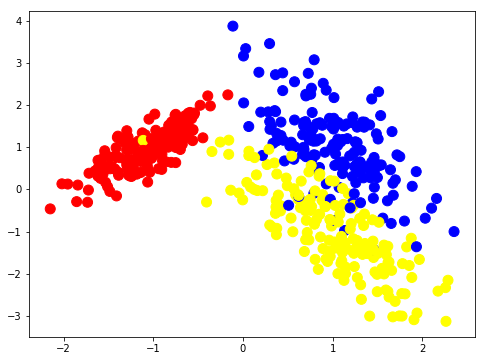

In [140]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

In [141]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

Используем модель KNeighborsClassifier.

In [142]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [143]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.95333333333333337

In [144]:
predictions

array([0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0,
       2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1])

Визуализируем разделяющие поверхности, получаемые при решении задачи классификации методом $k$ ближайших соседей для разных $k$.

In [145]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [146]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

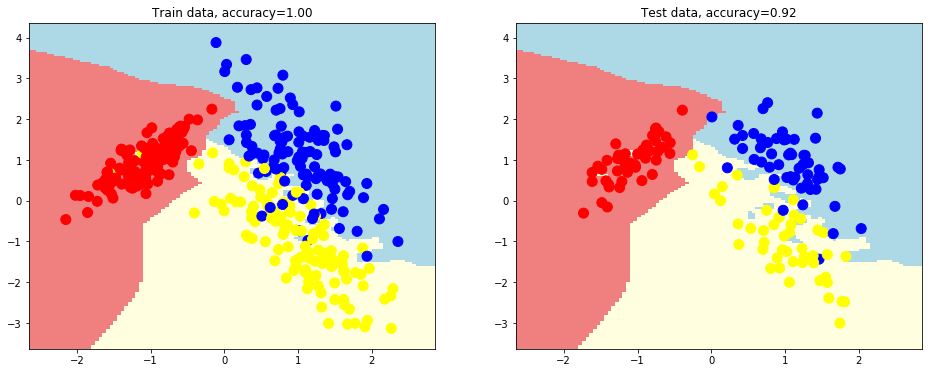

In [147]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

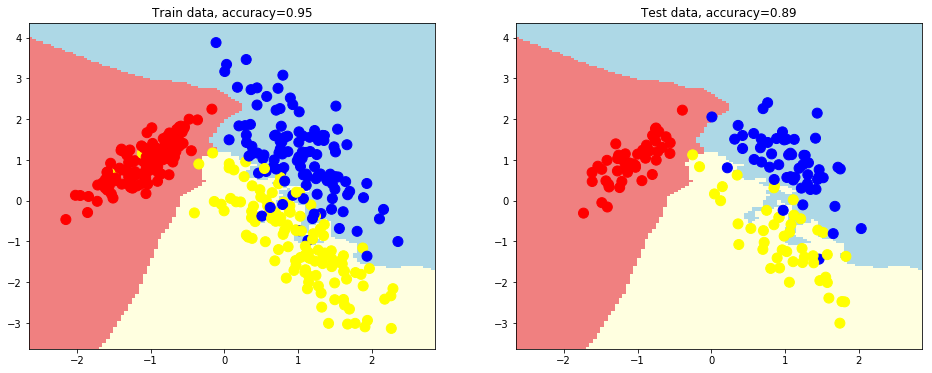

In [148]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

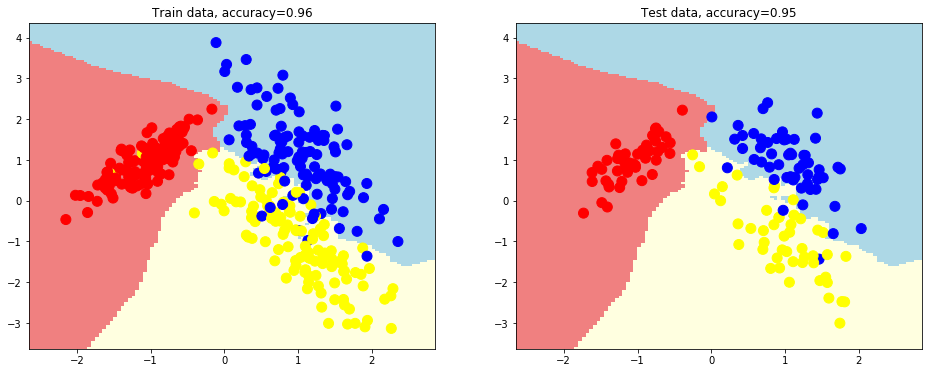

In [149]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

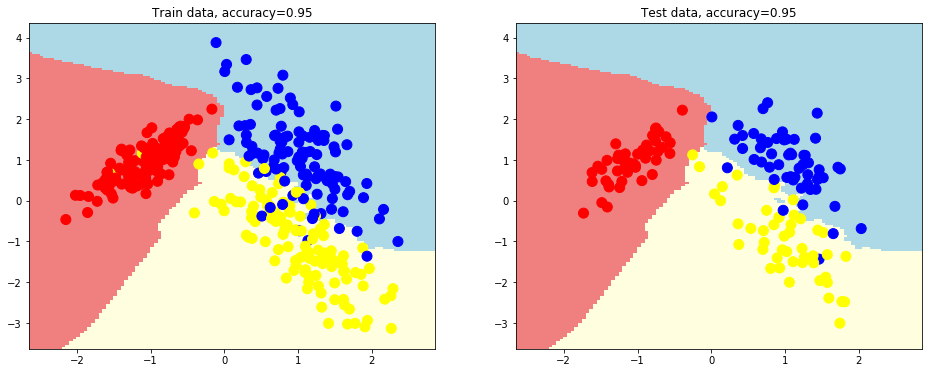

In [150]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

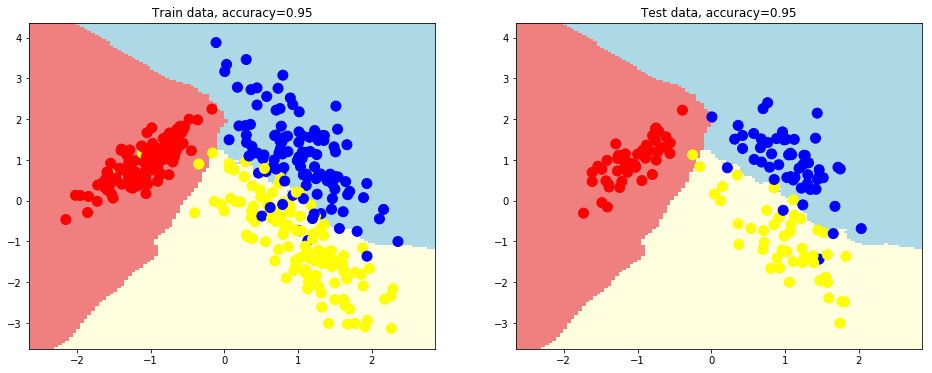

In [151]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

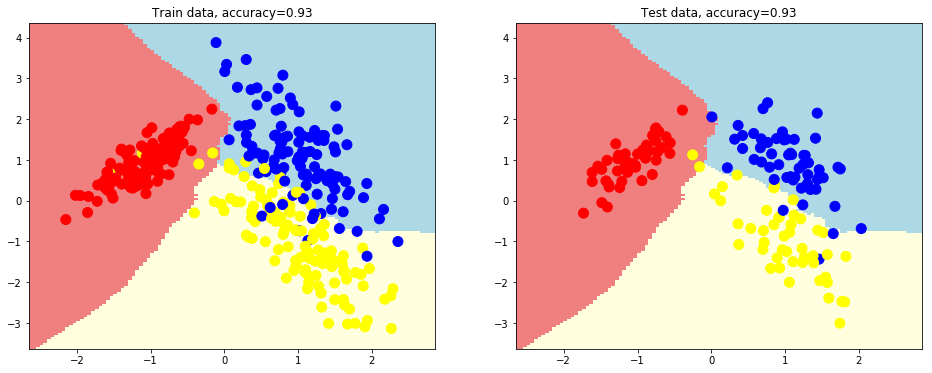

In [152]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

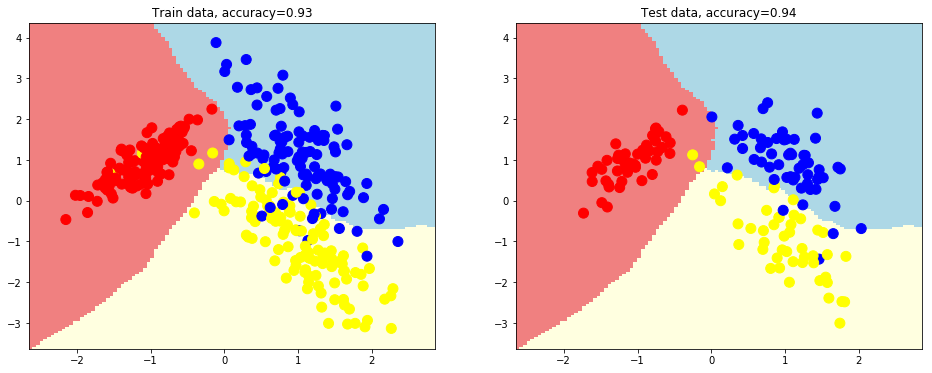

In [153]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

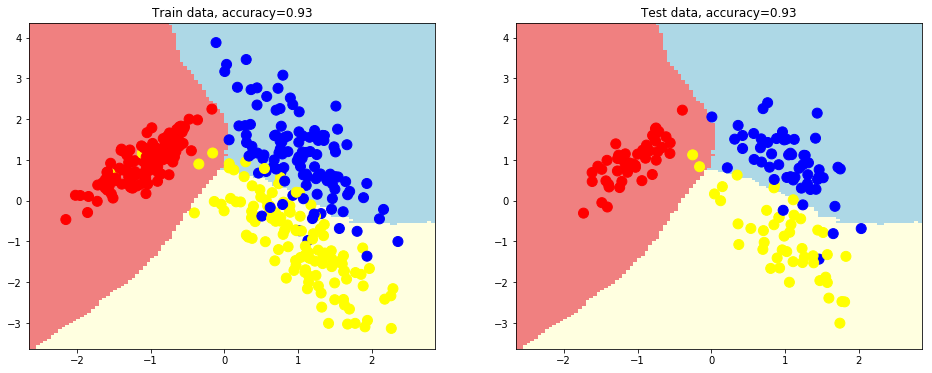

In [154]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

Построим график зависимости accuracy в кроссвалидации от $k$.

In [162]:
kf = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 10)
accuracy = np.zeros(40)
for train_index, test_index in kf.split(np.arange(500)):
    train_data = classification_problem[0][train_index]
    test_data = classification_problem[0][test_index]
    train_labels = classification_problem[1][train_index]
    test_labels = classification_problem[1][test_index] 
    #print train_data
    for k in np.arange(40)+1:
        estimator = neighbors.KNeighborsClassifier(n_neighbors = k)
        estimator.fit(train_data, train_labels)
        accuracy[k-1] += metrics.accuracy_score(test_labels, estimator.predict(test_data))/5
print accuracy

[ 0.898  0.89   0.94   0.934  0.936  0.938  0.94   0.936  0.94   0.942
  0.942  0.936  0.94   0.936  0.934  0.932  0.93   0.93   0.932  0.926
  0.93   0.924  0.928  0.924  0.924  0.922  0.922  0.922  0.926  0.926
  0.926  0.926  0.926  0.926  0.926  0.924  0.924  0.922  0.922  0.924]


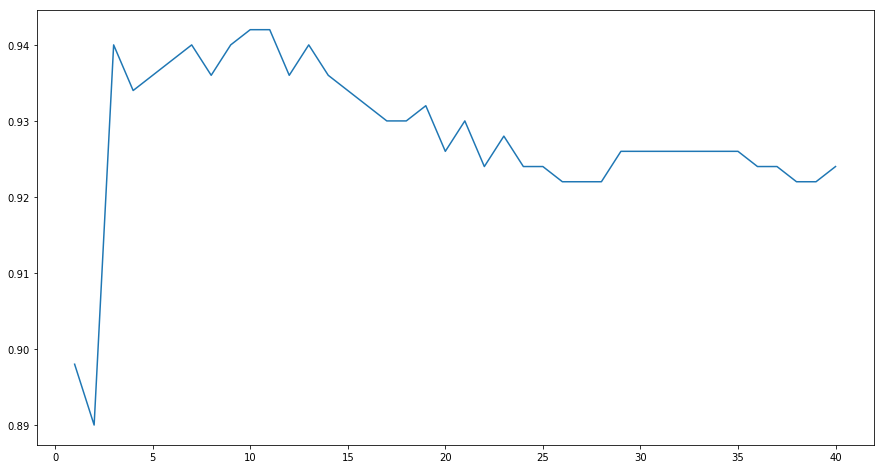

In [173]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(40)+1, accuracy)
plt.show()

Таким образом, наилучшее accuracy в кросс-валидации достигается при $k$ равным 10 или 11.